In [27]:
import os, re, sys
import pandas as pd

In [3]:
def omit_symbols(text):
    text = text.replace('\n', ' ')
    text = re.sub('[\(\)]', '', text)
    text = re.sub("\s\'", ' ', text)
    text = re.sub("\'\s", ' ', text)
    text = re.sub('[\.;:!?]', '\n', text)
    text = text.split('\n')
    text = [re.sub('^\s+', '', t) for t in text]
    
    r = []
    for line in text:
        if ',' in line:
            line = line.split(',')
            line = [re.sub('^\s+', '', l) for l in line]
            r.extend(line)
        else:
            r.append(line)
    return r
    

In [2]:
#30. Reading the result
#Implement a program that reads the result of part-of-speech tagging. 
#Here, represent a sentence as a list of mapping objects, 
#each of which associates a surface form, lemma (base form), 
#part-of-speech tag with the keys twith ext, lemma, pos. 
#Use this representation in the rest of the problems.

pos = []
with open('alice/alice.txt.conll', 'r') as f:
    data = f.readlines()
    for line in data:
        line = line.replace('\n','')
        line = line.split('\t')
        
        if len(line) > 1:
            tmp = {"text": line[1], "lemma":line[2], "pos":line[3]}
            pos.append(tmp)
    
pos

[{'text': 'ALICE', 'lemma': 'ALICE', 'pos': 'NNP'},
 {'text': "'S", 'lemma': "'s", 'pos': 'POS'},
 {'text': 'ADVENTURES', 'lemma': 'ADVENTURES', 'pos': 'NNP'},
 {'text': 'IN', 'lemma': 'in', 'pos': 'IN'},
 {'text': 'WONDERLAND', 'lemma': 'WONDERLAND', 'pos': 'NNP'},
 {'text': 'Lewis', 'lemma': 'Lewis', 'pos': 'NNP'},
 {'text': 'Carroll', 'lemma': 'Carroll', 'pos': 'NNP'},
 {'text': 'THE', 'lemma': 'the', 'pos': 'DT'},
 {'text': 'MILLENNIUM', 'lemma': 'MILLENNIUM', 'pos': 'NNP'},
 {'text': 'FULCRUM', 'lemma': 'FULCRUM', 'pos': 'NNP'},
 {'text': 'EDITION', 'lemma': 'EDITION', 'pos': 'NNP'},
 {'text': '3.0', 'lemma': '3.0', 'pos': 'CD'},
 {'text': 'CHAPTER', 'lemma': 'chapter', 'pos': 'NN'},
 {'text': 'I.', 'lemma': 'i.', 'pos': 'NN'},
 {'text': 'Down', 'lemma': 'down', 'pos': 'IN'},
 {'text': 'the', 'lemma': 'the', 'pos': 'DT'},
 {'text': 'Rabbit-Hole', 'lemma': 'Rabbit-Hole', 'pos': 'NNP'},
 {'text': 'Alice', 'lemma': 'Alice', 'pos': 'NNP'},
 {'text': 'was', 'lemma': 'be', 'pos': 'VBD'}

In [7]:
#31. Verbs
#Extract surface forms of all verbs appearing in the text.
verbs = set()
unique_words = []
with open('alice/alice.txt','r') as f:
    text = f.readlines()
    for e, line in enumerate(text):
        #if e%100 == 0:
        #    print ('{}/{}'.format(e, len(text)))
        sym = ["?", "!","#","$","%","&", "(",")",":",";", ",", "--", '"']
        line = line.replace('\n','')
        for s in sym:
            line = line.replace(s, ' '+s+' ')
            
        if line != '':
            words = line.split(' ')
            for word in words:
                for d in pos:
                    if d['text'] == word and 'VB' in d['pos']:
                        verbs.add(d['text'])
                        break
                #if word not in unique_words:
                #    unique_words.append(word)
                #    for d in pos:
                #        if d['text'] == word and 'VB' in d['pos']:
                #            verbs.add(d['text'])
                #            break
                            
verbs

{"'till",
 'ARE',
 'Allow',
 'BE',
 'BEG',
 'Be',
 'COULD',
 'Come',
 'Coming',
 'DOES',
 'Digging',
 'Do',
 'Drawling',
 'FIT',
 'GAVE',
 'Go',
 'HATED',
 'HAVE',
 'Has',
 'Heads',
 'IS',
 'Imagine',
 'Improve',
 'Involved',
 'Keep',
 'LEAVE',
 'Laughing',
 'Let',
 'MUST',
 'NEVER',
 'PLEASE',
 'PROVES',
 'Pinch',
 'Please',
 'Pray',
 'RETURNED',
 'SAID',
 'SOMETHING',
 'SWIM',
 'Said',
 'See',
 'Sends',
 'Sing',
 'Sounds',
 'Stole',
 'Stop',
 'Stretching',
 'Suppress',
 'THINK',
 'TOOK',
 'Take',
 'Tell',
 'Trims',
 'Turn',
 'WAS',
 'WATCH',
 'WOULD',
 'Waiting',
 'Was',
 'Writhing',
 'abide',
 'added',
 'adding',
 'addressed',
 'addressing',
 'advance',
 'advise',
 'afford',
 'agree',
 'airs',
 'alarmed',
 'allow',
 'am',
 'annoy',
 'answer',
 'answered',
 'appealed',
 'appear',
 'appeared',
 'appearing',
 'are',
 'argued',
 'arranged',
 'arrived',
 'ask',
 'asked',
 'asking',
 'assembled',
 'ate',
 'attempted',
 'attended',
 'attending',
 'attends',
 'avoid',
 'baked',
 'balanced',

In [8]:
#32. Base forms of verbs
# Extract lemmas of all verbs appearing in the text.
verbs_lemma = set()
with open('alice/alice.txt','r') as f:
    text = f.readlines()
    for e, line in enumerate(text):
        #if e%100 == 0:
        #    print ('{}/{}'.format(e, len(text)))
        sym = ["?", "!","#","$","%","&", "(",")",":",";", ",", "--", '"']
        line = line.replace('\n','')
        for s in sym:
            line = line.replace(s, ' '+s+' ')
            
        if line != '':
            words = line.split(' ')
            #print (line)
            for word in words:
                for d in pos:
                    if d['text'] == word and 'VB' in d['pos']:
                        verbs_lemma.add(d['lemma'])
                        break
                        
verbs_lemma

{"'till",
 'abide',
 'add',
 'address',
 'advance',
 'advise',
 'afford',
 'agree',
 'air',
 'alarm',
 'allow',
 'annoy',
 'answer',
 'appeal',
 'appear',
 'argue',
 'arrange',
 'arrive',
 'ask',
 'assemble',
 'attempt',
 'attend',
 'avoid',
 'bake',
 'balance',
 'bark',
 'bawl',
 'be',
 'bear',
 'beat',
 'beautify',
 'become',
 'beg',
 'begin',
 'behead',
 'believe',
 'belong',
 'bend',
 'bind',
 'bite',
 'black',
 'bleed',
 'blow',
 'bother',
 'bow',
 'box',
 'brave',
 'break',
 'breathe',
 'brighten',
 'bring',
 'bristle',
 'burn',
 'burst',
 'cackle',
 'call',
 'camomile',
 'caper',
 'care',
 'carry',
 'catch',
 'cause',
 'chance',
 'change',
 'cheat',
 'check',
 'cheer',
 'choke',
 'choose',
 'clasp',
 'clear',
 'climb',
 'cling',
 'close',
 'coax',
 'collect',
 'come',
 'complain',
 'conclude',
 'condemn',
 'confuse',
 'consent',
 'consider',
 'continue',
 'contradict',
 'cost',
 'could',
 'count',
 'crash',
 'crawl',
 'creep',
 'croquet',
 'cross',
 'cross-examine',
 'crouch',
 

In [62]:
#33. A of B
#Extract noun phrases in the form of “A of B”, where A and B are nouns
noun_phrases = set()
pattern = '([a-zA-Z0-9\-\']+?) of (.+?) '
with open('alice/alice.txt','r') as f:
    text = f.read()
    text = omit_symbols(text)
    
    for line in text:
        c = re.search(pattern, line)
        if c:
            A = c.groups()[0]
            B = c.groups()[1]
            flag = 0
            for d in pos:
                if d['text'] == A and 'NN' in d['pos']:
                    flag += 1
                    break
            for d in pos:
                if d['text'] == B and 'NN' in d['pos']:
                    flag += 1
                    break
                    
            if flag == 2:
                noun_phrases.add(A +' of ' + B)
noun_phrases

{'Adventures of hers',
 'Pool of Tears',
 'Queen of Hearts',
 'atom of meaning',
 'back of one',
 'book of rules',
 'cauldron of soup',
 'chorus of voices',
 'clapping of hands',
 'court of justice',
 'dish of tarts',
 'dream of Wonderland',
 'earls of Mercia',
 'end of half',
 'game of croquet',
 'game of play',
 'half of fright',
 'heap of sticks',
 'kind of authority',
 'kind of thing',
 'look of things',
 'meaning of half',
 'number of bathing',
 'number of changes',
 'number of cucumber-frames',
 'number of executions',
 'pair of boots',
 'pair of gloves',
 'pattering of feet',
 'pattering of footsteps',
 'person of authority',
 'piece of evidence',
 'piece of rudeness',
 'pieces of mushroom',
 'plenty of time',
 'pool of tears',
 'question of course',
 'questions of eating',
 'row of lamps',
 'saucer of milk',
 'scroll of parchment',
 'sister of hers',
 'sort of chance',
 'sort of idea',
 'sort of lullaby',
 'sort of meaning',
 'sort of people',
 'sort of thing',
 'sort of use',


In [66]:
'''
34. A B
Extract the longest noun phrase consisting of consecutive nouns.
'''

with open('alice/alice.txt','r') as f:
    text = f.read()
    text = omit_symbols(text)
    longest_noun = []
    for line in text:
        words = line.split(' ')
        
        nouns = []
        for word in words:
            for d in pos:
                if d['text'] == word:
                    if 'NN' in d['pos']:
                        nouns.append(word)
                    else:
                        if len(nouns) > len(longest_noun):
                            longest_noun = nouns
                            
                        nouns = []
                    break

' '.join(longest_noun)

'thing Mock Turtle Soup'

In [4]:
'''
35. Frequency of words
Obtain the list of words and frequencies of their occurrences sorted by descending order of frequency.
'''

words = {}
with open('alice/alice.txt','r') as f:
    text = f.read()
    text = omit_symbols(text)
    for line in text:
        line = line.split(' ')
        for word in line:
            if word == '': continue
            if word not in words:
                words[word] = 0
                
            words[word] += 1
            
for word, freq in sorted(words.items(), key=lambda x:x[1], reverse  = True):
    print (word, freq)



the 1514
and 772
to 716
a 609
she 498
of 494
it 479
said 453
I 389
Alice 385
in 353
was 352
you 307
that 257
as 245
her 243
at 199
on 189
had 177
with 176
all 171
be 144
for 139
not 127
very 126
but 126
little 124
so 121
this 113
out 112
The 107
they 107
down 98
he 97
up 96
about 94
his 94
one 91
what 90
is 90
were 84
went 83
like 83
herself 83
them 83
again 82
know 80
if 76
or 74
thought 74
could 73
have 73
would 70
then 70
when 69
do 68
no 68
into 67
And 67
Queen 67
time 65
see 64
off 62
me 61
* 60
did 59
King 59
began 58
its 56
Mock 56
my 55
I'm 55
Turtle 55
Gryphon 55
Hatter 54
by 53
quite 53
your 53
an 52
way 51
don't 51
much 50
say 50
their 50
there 49
thing 49
some 48
who 48
think 47
head 47
go 47
only 46
now 46
more 46
voice 46
looked 45
got 45
just 44
get 43
are 43
first 42
must 41
which 41
round 41
Rabbit 40
over 40
never 40
such 40
came 40
It 40
tone 40
here 39
great 39
other 39
any 39
Duchess 39
Dormouse 39
how 38
been 38
But 37
back 37
What 37
You 37
him 37
before 36
after

<BarContainer object of 10 artists>

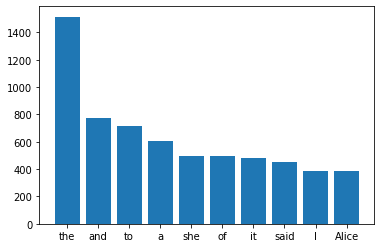

In [7]:
'''
36. Top-ten frequent words
Visualize the top-ten frequent words and their frequencies with a chart (e.g., bar chart).
'''

from matplotlib import pyplot as plt
X = []
Y = []

for e, (word, freq) in enumerate(sorted(words.items(), key=lambda x:x[1], reverse = True)):
    if e == 10:
        break
        
    X.append(word)
    Y.append(freq)
    
plt.bar(X,Y)

<BarContainer object of 10 artists>

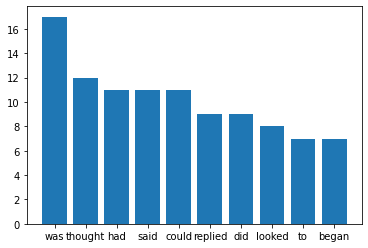

In [13]:
'''
37. Top-ten words co-occurring with ‘Alice’
Extract the list of words that co-occur with the word “Alice”. 
Visualize with a chart (e.g., bar chart) the top-ten words co-occurring with the word “Alice” and their frequencies.
'''

alice_words = {}

with open('alice/alice.txt','r') as f:
    text = f.read()
    text = omit_symbols(text)
    for line in text:
        line = line.split(' ')
        for i in range(len(line)):
            if line[i] == 'Alice' and i != len(line) -1:
                if line[i+1] not in alice_words:
                    alice_words[line[i+1]] = 0
                alice_words[line[i+1]] += 1
                  
X = []
Y = []
for e, (word, freq) in enumerate(sorted(alice_words.items(), key=lambda x:x[1], reverse = True)):
    if e == 10:
        break
        
    X.append(word)
    Y.append(freq)
    
plt.bar(X,Y)



<BarContainer object of 1515 artists>

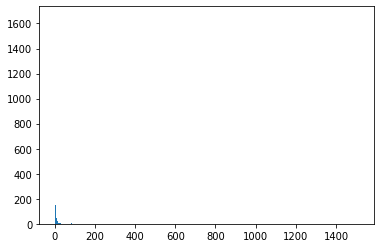

In [32]:
'''
38. Histogram
Draw a histogram of word frequency 
(x-axis is a scalar range representing a frequency ranging from 1 to the largest frequency of a given word in the entire corpus, 
and the y-axis is the count of unique words that fall into the count of the x value).
'''


freq_words = sorted(words.items(), key=lambda x:x[1], reverse = True)
X = freq_words[0][1]+1
Y = [0 for i in range(X)]

for word, freq in freq_words:
    Y[freq] += 1

plt.bar([i for i in range(X)],Y)

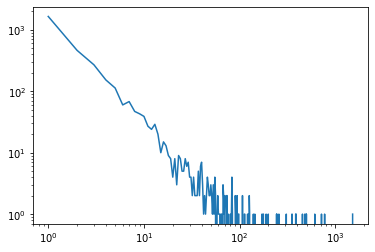

In [36]:
'''39. Zipf’s law
Plot a log-log graph with the x-axis being rank order and the y-axis being frequency.'''

plt.xscale("log")
plt.yscale("log")
plt.plot([i for i in range(X)][1:],Y[1:])